In [79]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sb
import sklearn

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [80]:
dataframe = pd.read_csv("petrol_consumption.csv")
dataframe.head()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524
2,9.0,3865,1586,0.580,561
3,7.5,4870,2351,0.529,414
4,8.0,4399,431,0.544,410


In [81]:
dataframe.describe()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
count,48.000000,48.000000,48.000000,48.000000,48.000000
mean,7.668333,4241.833333,5565.416667,0.570333,576.770833
std,0.950770,573.623768,3491.507166,0.055470,111.885816
min,5.000000,3063.000000,431.000000,0.451000,344.000000
25%,7.000000,3739.000000,3110.250000,0.529750,509.500000
50%,7.500000,4298.000000,4735.500000,0.564500,568.500000
75%,8.125000,4578.750000,7156.000000,0.595250,632.750000
max,10.000000,5342.000000,17782.000000,0.724000,968.000000


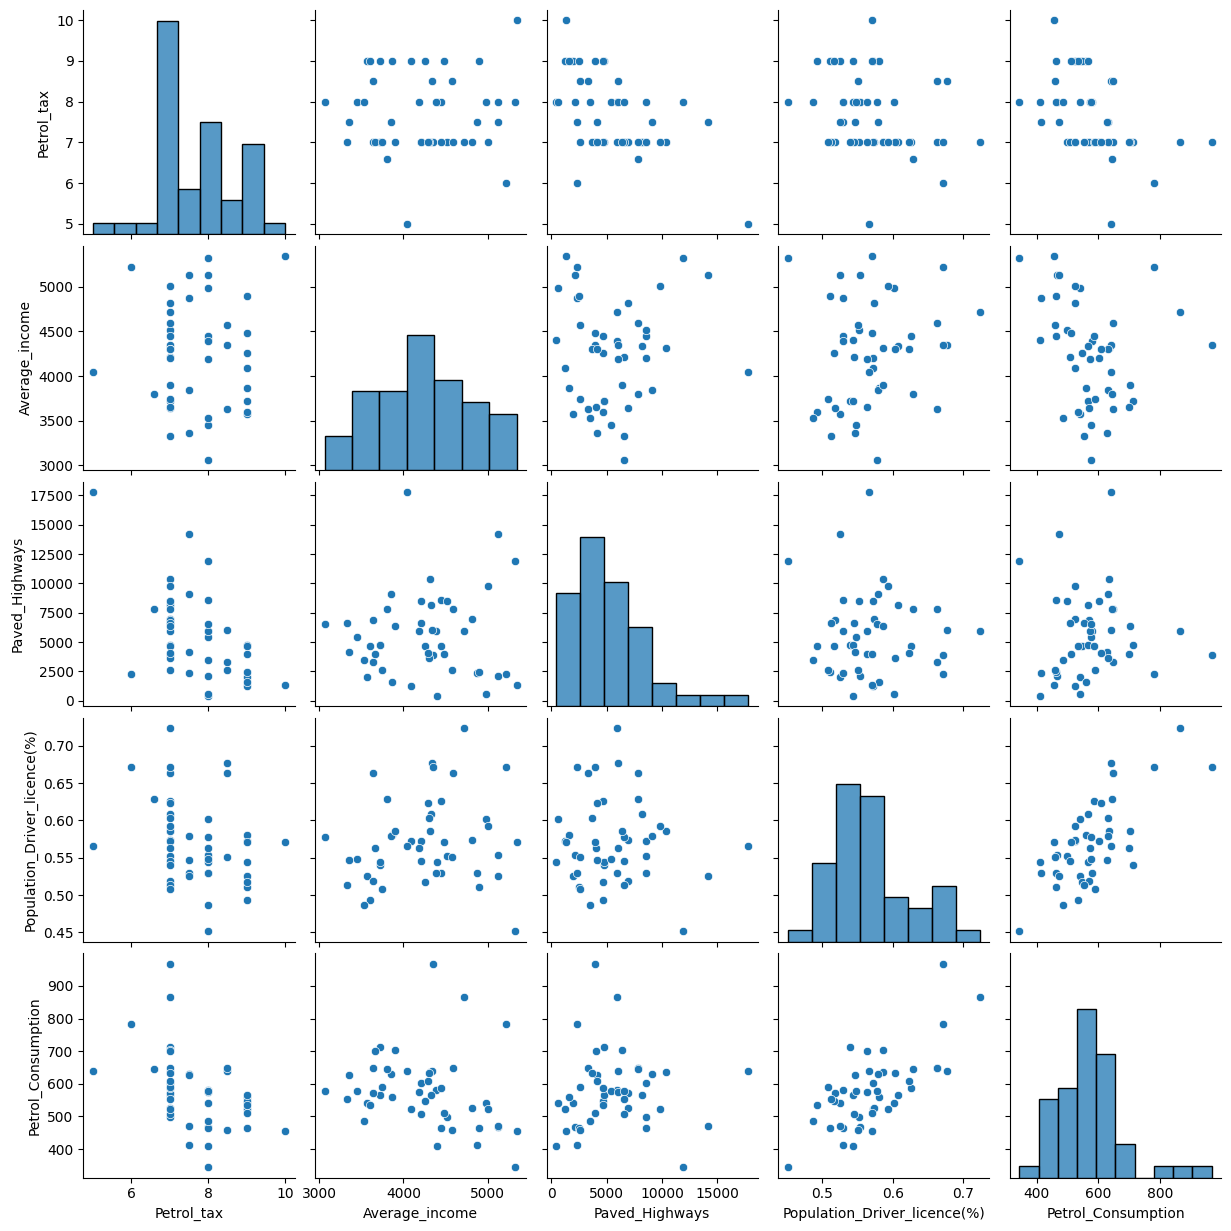

In [82]:
sb.pairplot(dataframe)

In [83]:
correlation = dataframe.corr()
correlation

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
Petrol_tax,1.000000,0.012665,-0.522130,-0.288037,-0.451280
Average_income,0.012665,1.000000,0.050163,0.157070,-0.244862
Paved_Highways,-0.522130,0.050163,1.000000,-0.064129,0.019042
Population_Driver_licence(%),-0.288037,0.157070,-0.064129,1.000000,0.698965
Petrol_Consumption,-0.451280,-0.244862,0.019042,0.698965,1.000000


<AxesSubplot: >

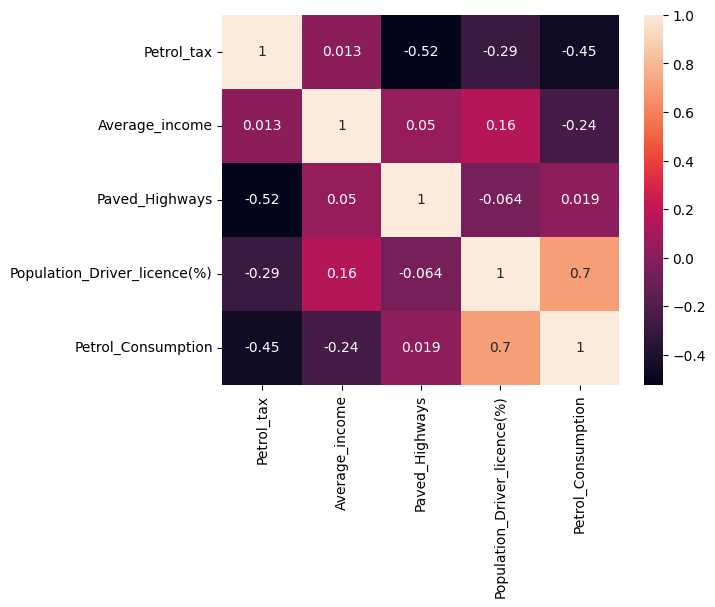

In [84]:
sb.heatmap(correlation, annot=True)

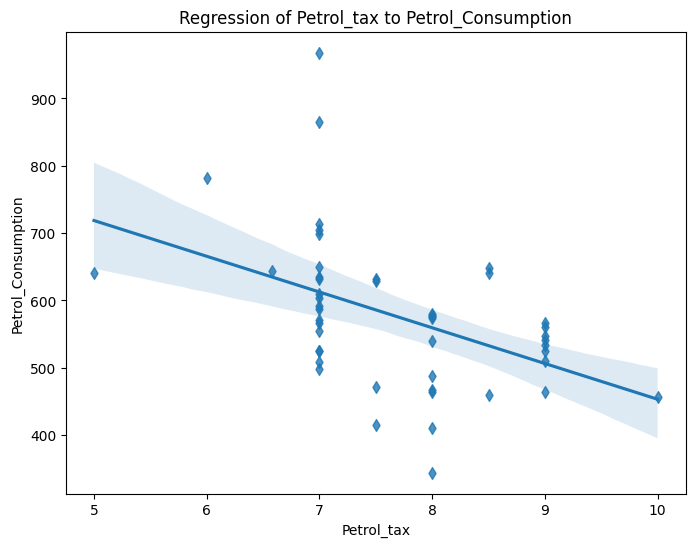

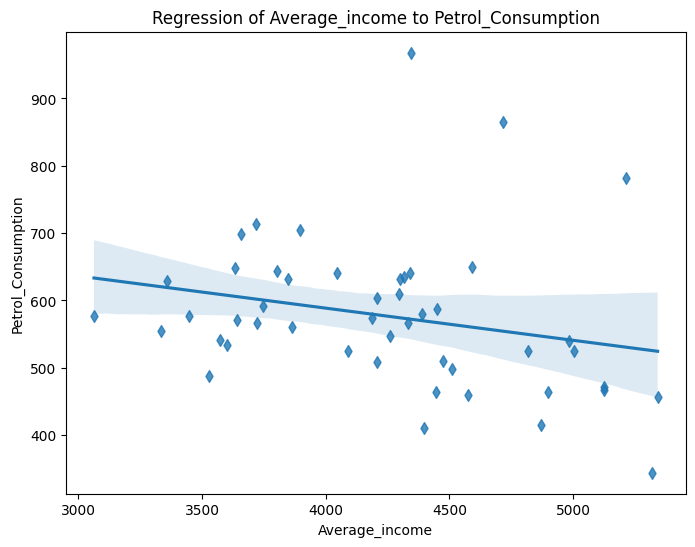

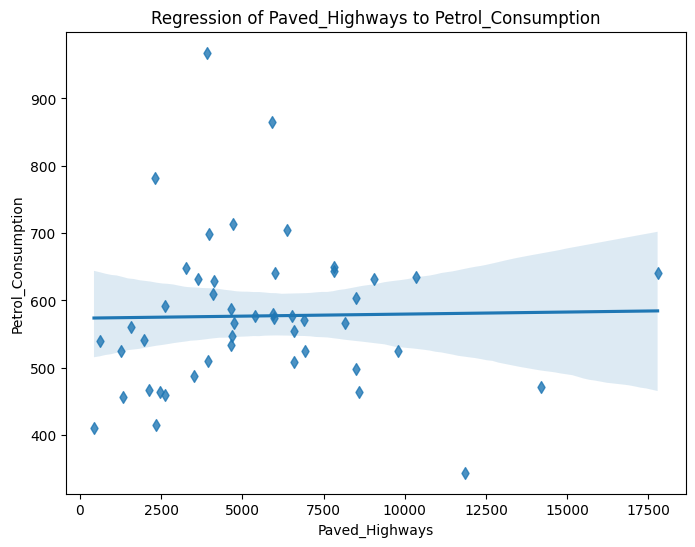

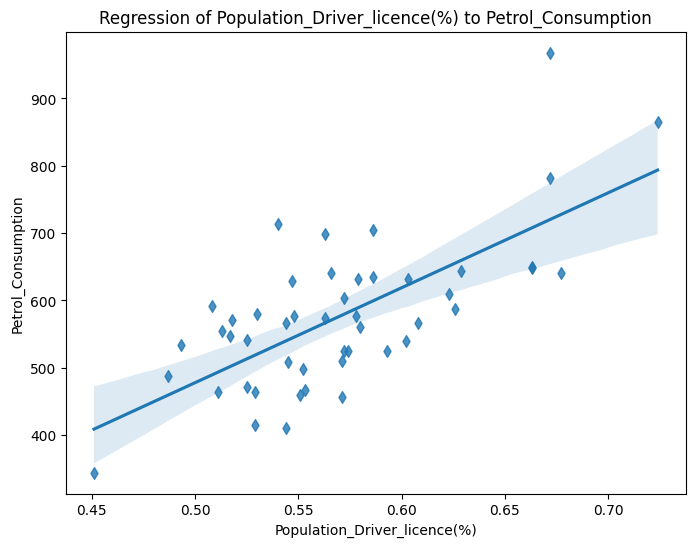

In [85]:
variables = ["Petrol_tax", "Average_income", "Paved_Highways", "Population_Driver_licence(%)"]

for var in variables:
    plt.figure(figsize=(8, 6), dpi=100)
    sb.regplot(x=var, y="Petrol_Consumption", data=dataframe, marker = "d").set(title=f"Regression of {var} to Petrol_Consumption")

In [86]:
X = dataframe[["Petrol_tax", "Average_income", "Paved_Highways", "Population_Driver_licence(%)"]]
y = dataframe["Petrol_Consumption"]

In [87]:
X.shape

(48, 4)

In [88]:
SEED = 48
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=SEED)

In [89]:
LinReg = LinearRegression()
LinReg.fit(X_train, y_train)

LinearRegression()

In [90]:
print(f"Beta_0: {LinReg.intercept_}, Beta_n: {LinReg.coef_}")

Beta_0: 344.58590039674596, Beta_n: [-3.53997019e+01 -5.87239243e-02 -3.65626158e-03  1.37093925e+03]


In [91]:
print(f"train_score: {LinReg.score(X_train, y_train)}")

train_score: 0.6895815278628233


In [92]:
print(f"test_score: {LinReg.score(X_test, y_test)}")

test_score: 0.42818683491379905


In [93]:
y_pred = LinReg.predict(X_test)
compare = pd.DataFrame({"y_test" : y_test, "y_pred" : y_pred})
compare

,y_test,y_pred
45,510,531.533629
3,414,509.733619
1,524,565.297211
14,566,646.095575
37,704,647.966027
40,587,676.771823
9,498,557.480292
11,471,445.944682
19,640,694.919622
24,460,520.896984


In [94]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f'Mean absolute error: {mae:.2f}')
print(f'Mean squared error: {mse:.2f}')
print(f'Root mean squared error: {rmse:.2f}')

Mean absolute error: 58.48
Mean squared error: 3983.85
Root mean squared error: 63.12


**The score is far away from 1.0, but not close to 0. However, deviations between trained and predicted varry much. The model kinda works, but can be better with additional data.**